# Milestone 3
# *Frequency Distribution and Graphical Representation*




## A. Introduction

The goal of this milestone is to analyze distribution of variables.
I will create a frequency distribution table to summarize the data and then use suitable charts to visualize the distribution. This will help me understand the basic pattern and key characteristics of the data more clearly. This notebook follows the teacher’s instructions carefully. Each part from A to G is organized as a separate section and each column analysis is written as a runnable cell group. All outputs will be kept visible when the notebook is run in Colab.


## B. Dataset

I used the cleaned dataset from previous milestones.
Dataset used here: `2025-08-10.csv`


In [ ]:
# B. Load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = r"2025-08-10.csv"
df = pd.read_csv(DATA_PATH)
print('Loaded:', DATA_PATH)
print('Shape:', df.shape)
print('Columns:', df.columns.tolist())

df.head(10)


Loaded: 2025-08-10.csv
Shape: (64, 18)
Columns: ['date', 'district', 'division', 'lat', 'lon', 'temp_c', 'humidity', 'pressure', 'wind_speed', 'clouds', 'rain', 'aqi', 'pm2_5', 'pm10', 'o3', 'no2', 'so2', 'co']


,date,district,division,lat,lon,temp_c,humidity,pressure,wind_speed,clouds,rain,aqi,pm2_5,pm10,o3,no2,so2,co
0,2025-08-10,Bagerhat,Khulna,22.655478,89.794181,32.00,63,1006,3.94,100,0.0,1,1.43,3.24,40.23,0.13,0.18,98.31
1,2025-08-10,Bandarban,Chattogram,21.787476,92.412475,33.56,54,1006,1.09,96,0.0,1,0.94,1.48,31.99,0.04,0.02,79.80
2,2025-08-10,Barguna,Barishal,22.131336,90.117243,31.90,65,1006,5.18,100,0.0,1,1.10,2.93,33.37,0.03,0.09,85.17
3,2025-08-10,Barishal,Barishal,22.493403,90.354801,33.42,55,1006,5.08,100,0.0,1,0.99,2.44,34.83,0.04,0.07,85.93
4,2025-08-10,Bhola,Barishal,22.143569,90.790409,29.38,77,1007,4.41,98,0.0,1,0.51,1.29,32.46,0.02,0.03,82.80
5,2025-08-10,Bogura,Rajshahi,24.850066,89.372843,33.94,57,1004,4.17,84,0.0,3,30.62,34.07,66.92,8.73,11.25,293.51
6,2025-08-10,Brahmanbaria,Chattogram,23.960600,91.119089,33.06,66,1006,4.12,75,0.0,1,1.23,2.12,32.13,1.03,0.42,109.33
7,2025-08-10,Chandpur,Chattogram,23.224176,90.653100,32.58,61,1006,4.26,98,0.0,1,0.67,1.39,33.11,0.34,0.27,89.17
8,2025-08-10,Chapai Nawabganj,Rajshahi,24.599887,88.285047,35.13,52,1004,4.03,76,0.0,3,35.50,38.31,79.41,7.30,15.25,304.89
9,2025-08-10,Chattogram,Chattogram,22.333778,91.834435,31.93,66,1007,4.12,40,0.0,1,0.61,1.18,29.40,0.03,0.02,79.32


In [ ]:
# Helper functions for frequency tables, plots, stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def grouped_frequency_table(series, bins='sturges', k=None):
    s = series.dropna().astype(float)
    n = len(s)
    if n == 0:
        return pd.DataFrame()
    if k is None:
        try:
            edges = np.histogram_bin_edges(s, bins=bins)
        except Exception:
            edges = np.histogram_bin_edges(s, bins='sturges')
        if len(edges) <= 1:
            edges = np.linspace(s.min(), s.max(), 6)
    else:
        edges = np.linspace(s.min(), s.max(), k+1)
    cats = pd.cut(s, bins=edges, include_lowest=True, right=True)
    freq = cats.value_counts(sort=False)
    rel_freq = freq / n
    cum_freq = freq.cumsum()
    rel_cum = rel_freq.cumsum()
    intervals = []
    lowers = []
    uppers = []
    mids = []
    for iv in freq.index:
        lower = float(iv.left)
        upper = float(iv.right)
        mid = (lower + upper)/2.0
        intervals.append(f"{lower:.6g} - {upper:.6g}")
        lowers.append(lower)
        uppers.append(upper)
        mids.append(mid)
    table = pd.DataFrame({
        'Class Interval': intervals,
        'Lower': lowers,
        'Upper': uppers,
        'Midpoint': mids,
        'Frequency (f)': freq.values,
        'Relative Frequency (rf)': rel_freq.values,
        'Cumulative Frequency (cf)': cum_freq.values,
        'Relative Cumulative Frequency (rcf)': rel_cum.values
    })
    return table

def categorical_frequency_table(series):
    s = series.dropna().astype(str)
    n = len(s)
    if n==0:
        return pd.DataFrame()
    freq = s.value_counts(sort=True)
    rel = freq / n
    cum = freq.cumsum()
    relcum = rel.cumsum()
    table = pd.DataFrame({
        'Category': freq.index,
        'Frequency (f)': freq.values,
        'Relative Frequency (rf)': rel.values,
        'Cumulative Frequency (cf)': cum.values,
        'Relative Cumulative Frequency (rcf)': relcum.values
    })
    return table

def numeric_stats(series):
    s = series.dropna().astype(float)
    if len(s)==0:
        return {}
    return {
        'count': int(s.count()),
        'mean': float(s.mean()),
        'median': float(s.median()),
        'std': float(s.std()),
        'min': float(s.min()),
        'max': float(s.max()),
        'skew': float(s.skew())
    }

def detect_outliers_iqr(series):
    s = series.dropna().astype(float)
    if len(s)==0:
        return []
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
    out = s[(s < low) | (s > high)]
    return out.tolist()

def plot_histogram(series, bins='sturges', k=None, title=None, xlabel=None):
    s = series.dropna().astype(float)
    if len(s)==0:
        print('No data to plot.')
        return
    if k is None:
        edges = np.histogram_bin_edges(s, bins=bins)
    else:
        edges = np.linspace(s.min(), s.max(), k+1)
    plt.figure(figsize=(8,4))
    plt.hist(s, bins=edges)
    if title: plt.title(title)
    if xlabel: plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.show()

def plot_frequency_polygon(table, title=None):
    if table.empty:
        print('No table to plot.')
        return
    x = table['Midpoint']
    y = table['Frequency (f)']
    plt.figure(figsize=(8,4))
    plt.plot(x, y, marker='o')
    if title: plt.title(title)
    plt.xlabel('Midpoint')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.show()

def plot_ogive(table, title=None):
    if table.empty:
        print('No table to plot.')
        return
    x = table['Upper']
    y = table['Cumulative Frequency (cf)']
    plt.figure(figsize=(8,4))
    plt.plot(x, y, marker='o')
    if title: plt.title(title)
    plt.xlabel('Upper class boundary')
    plt.ylabel('Cumulative Frequency')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.show()


## C. Task 1: Frequency Distribution Table


In [ ]:
# C: Frequency table for numeric column: temp_c
col = "temp_c"
if col not in df.columns:
    print('Column not found:', col)
else:
    table = grouped_frequency_table(df[col], bins='sturges')
    print('Frequency distribution table for column:', col)
    display(table)
    table.to_csv(f"freq_table_{col}.csv", index=False)
    print('Saved: freq_table_{col}.csv')


Frequency distribution table for column: temp_c


,Class Interval,Lower,Upper,Midpoint,Frequency (f),Relative Frequency (rf),Cumulative Frequency (cf),Relative Cumulative Frequency (rcf)
0,28.539 - 29.481,28.539,29.481,29.0100,3,0.046875,3,0.046875
1,29.481 - 30.423,29.481,30.423,29.9520,0,0.000000,3,0.046875
2,30.423 - 31.364,30.423,31.364,30.8935,7,0.109375,10,0.156250
3,31.364 - 32.306,31.364,32.306,31.8350,21,0.328125,31,0.484375
4,32.306 - 33.247,32.306,33.247,32.7765,18,0.281250,49,0.765625
5,33.247 - 34.189,33.247,34.189,33.7180,13,0.203125,62,0.968750
6,34.189 - 35.13,34.189,35.130,34.6595,2,0.031250,64,1.000000


Saved: freq_table_{col}.csv


In [ ]:
# C: Frequency table for numeric column: humidity
col = "humidity"
if col not in df.columns:
    print('Column not found:', col)
else:
    table = grouped_frequency_table(df[col], bins='sturges')
    print('Frequency distribution table for column:', col)
    display(table)
    table.to_csv(f"freq_table_{col}.csv", index=False)
    print('Saved: freq_table_{col}.csv')


Frequency distribution table for column: humidity


,Class Interval,Lower,Upper,Midpoint,Frequency (f),Relative Frequency (rf),Cumulative Frequency (cf),Relative Cumulative Frequency (rcf)
0,51.999 - 56.286,51.999,56.286,54.1425,8,0.125000,8,0.125000
1,56.286 - 60.571,56.286,60.571,58.4285,14,0.218750,22,0.343750
2,60.571 - 64.857,60.571,64.857,62.7140,14,0.218750,36,0.562500
3,64.857 - 69.143,64.857,69.143,67.0000,16,0.250000,52,0.812500
4,69.143 - 73.429,69.143,73.429,71.2860,9,0.140625,61,0.953125
5,73.429 - 77.714,73.429,77.714,75.5715,1,0.015625,62,0.968750
6,77.714 - 82,77.714,82.000,79.8570,2,0.031250,64,1.000000


Saved: freq_table_{col}.csv


In [ ]:
# C: Frequency table for numeric column: wind_speed
col = "wind_speed"
if col not in df.columns:
    print('Column not found:', col)
else:
    table = grouped_frequency_table(df[col], bins='sturges')
    print('Frequency distribution table for column:', col)
    display(table)
    table.to_csv(f"freq_table_{col}.csv", index=False)
    print('Saved: freq_table_{col}.csv')


Frequency distribution table for column: wind_speed


,Class Interval,Lower,Upper,Midpoint,Frequency (f),Relative Frequency (rf),Cumulative Frequency (cf),Relative Cumulative Frequency (rcf)
0,0.459 - 1.153,0.459,1.153,0.8060,2,0.031250,2,0.031250
1,1.153 - 1.846,1.153,1.846,1.4995,1,0.015625,3,0.046875
2,1.846 - 2.539,1.846,2.539,2.1925,4,0.062500,7,0.109375
3,2.539 - 3.231,2.539,3.231,2.8850,4,0.062500,11,0.171875
4,3.231 - 3.924,3.231,3.924,3.5775,10,0.156250,21,0.328125
5,3.924 - 4.617,3.924,4.617,4.2705,26,0.406250,47,0.734375
6,4.617 - 5.31,4.617,5.310,4.9635,17,0.265625,64,1.000000


Saved: freq_table_{col}.csv


In [ ]:
# C: Frequency table for numeric column: rain
col = "rain"
if col not in df.columns:
    print('Column not found:', col)
else:
    table = grouped_frequency_table(df[col], bins='sturges')
    print('Frequency distribution table for column:', col)
    display(table)
    table.to_csv(f"freq_table_{col}.csv", index=False)
    print('Saved: freq_table_{col}.csv')


Frequency distribution table for column: rain


,Class Interval,Lower,Upper,Midpoint,Frequency (f),Relative Frequency (rf),Cumulative Frequency (cf),Relative Cumulative Frequency (rcf)
0,-0.501 - 0.5,-0.501,0.5,-0.0005,64,1.0,64,1.0


Saved: freq_table_{col}.csv


In [ ]:
# C: Frequency table for categorical column: district
col = "district"
if col not in df.columns:
    print('Column not found:', col)
else:
    table = categorical_frequency_table(df[col])
    print('Categorical frequency table for column:', col)
    display(table)
    table.to_csv(f"cat_freq_table_{col}.csv", index=False)
    print('Saved: cat_freq_table_{col}.csv')


Categorical frequency table for column: district


,Category,Frequency (f),Relative Frequency (rf),Cumulative Frequency (cf),Relative Cumulative Frequency (rcf)
0,Bagerhat,1,0.015625,1,0.015625
1,Bandarban,1,0.015625,2,0.031250
2,Barguna,1,0.015625,3,0.046875
3,Barishal,1,0.015625,4,0.062500
4,Bhola,1,0.015625,5,0.078125
...,...,...,...,...,...
59,Sirajganj,1,0.015625,60,0.937500
60,Sunamganj,1,0.015625,61,0.953125
61,Sylhet,1,0.015625,62,0.968750
62,Tangail,1,0.015625,63,0.984375


Saved: cat_freq_table_{col}.csv


In [ ]:
# C: Frequency table for categorical column: division
col = "division"
if col not in df.columns:
    print('Column not found:', col)
else:
    table = categorical_frequency_table(df[col])
    print('Categorical frequency table for column:', col)
    display(table)
    table.to_csv(f"cat_freq_table_{col}.csv", index=False)
    print('Saved: cat_freq_table_{col}.csv')


Categorical frequency table for column: division


,Category,Frequency (f),Relative Frequency (rf),Cumulative Frequency (cf),Relative Cumulative Frequency (rcf)
0,Dhaka,13,0.203125,13,0.203125
1,Chattogram,11,0.171875,24,0.375000
2,Khulna,10,0.156250,34,0.531250
3,Rajshahi,8,0.125000,42,0.656250
4,Rangpur,8,0.125000,50,0.781250
5,Barishal,6,0.093750,56,0.875000
6,Sylhet,4,0.062500,60,0.937500
7,Mymensingh,4,0.062500,64,1.000000


Saved: cat_freq_table_{col}.csv


## D. Task 2: Graphical Representation


Plotting for: temp_c


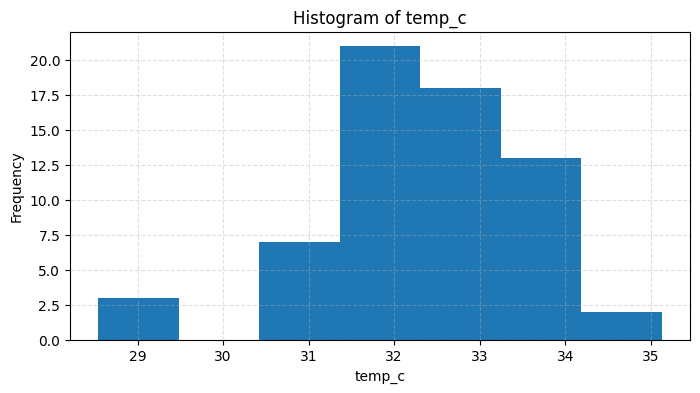

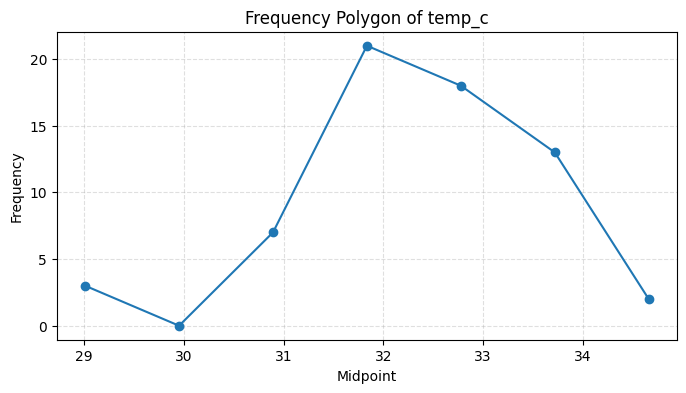

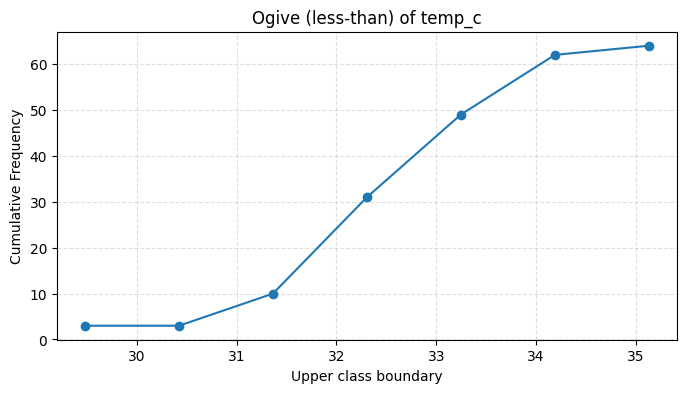

In [ ]:
# D: Plots for numeric column: temp_c
col = "temp_c"
if col not in df.columns:
    print('Column not found:', col)
else:
    s = df[col]
    print('Plotting for:', col)
    plot_histogram(s, bins='sturges', title=f'Histogram of {col}', xlabel=col)
    table = grouped_frequency_table(s, bins='sturges')
    plot_frequency_polygon(table, title=f'Frequency Polygon of {col}')
    plot_ogive(table, title=f'Ogive (less-than) of {col}')


Plotting for: humidity


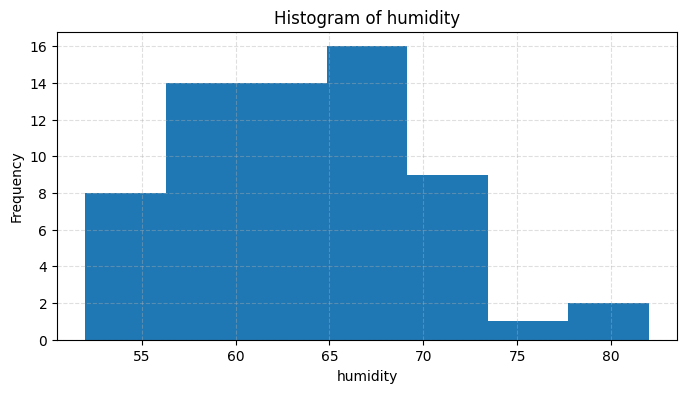

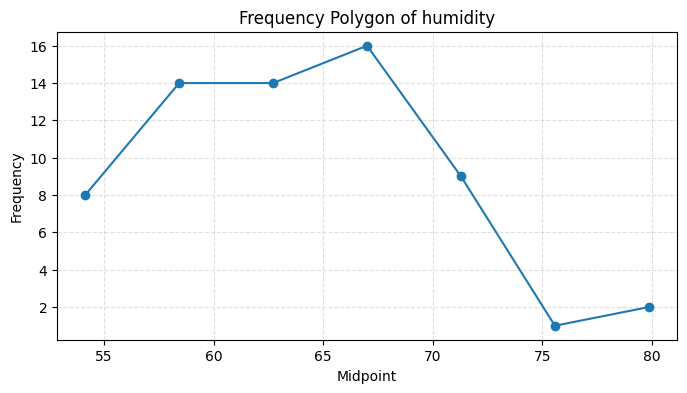

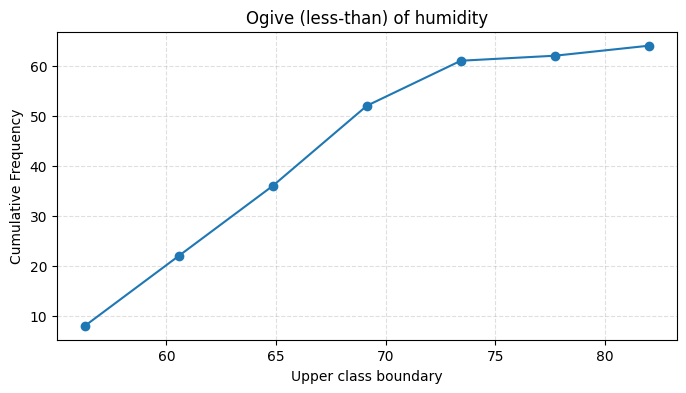

In [ ]:
# D: Plots for numeric column: humidity
col = "humidity"
if col not in df.columns:
    print('Column not found:', col)
else:
    s = df[col]
    print('Plotting for:', col)
    plot_histogram(s, bins='sturges', title=f'Histogram of {col}', xlabel=col)
    table = grouped_frequency_table(s, bins='sturges')
    plot_frequency_polygon(table, title=f'Frequency Polygon of {col}')
    plot_ogive(table, title=f'Ogive (less-than) of {col}')


Plotting for: wind_speed


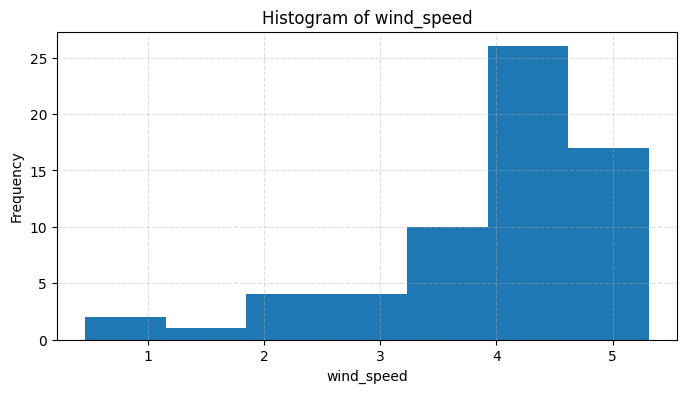

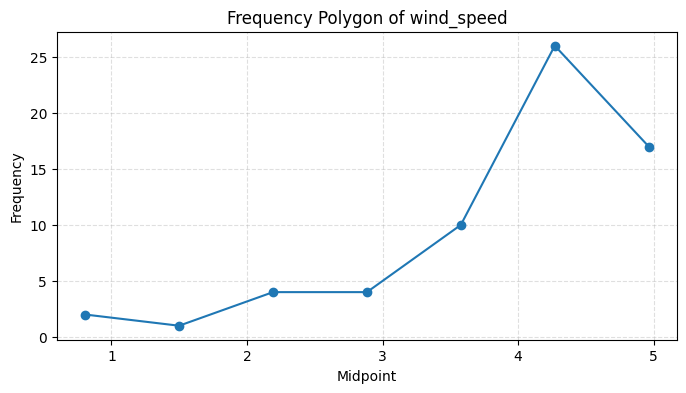

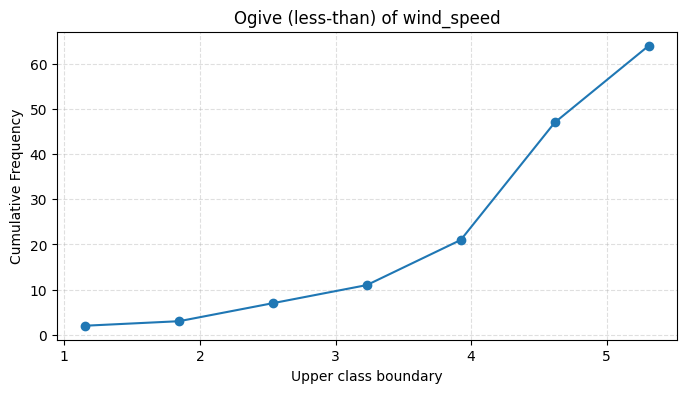

In [ ]:
# D: Plots for numeric column: wind_speed
col = "wind_speed"
if col not in df.columns:
    print('Column not found:', col)
else:
    s = df[col]
    print('Plotting for:', col)
    plot_histogram(s, bins='sturges', title=f'Histogram of {col}', xlabel=col)
    table = grouped_frequency_table(s, bins='sturges')
    plot_frequency_polygon(table, title=f'Frequency Polygon of {col}')
    plot_ogive(table, title=f'Ogive (less-than) of {col}')


Plotting for: rain


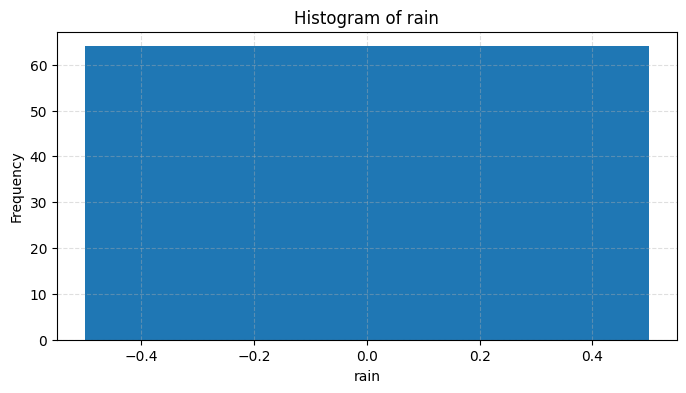

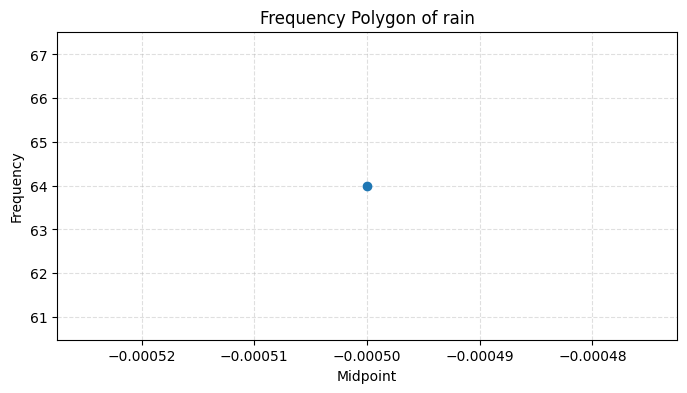

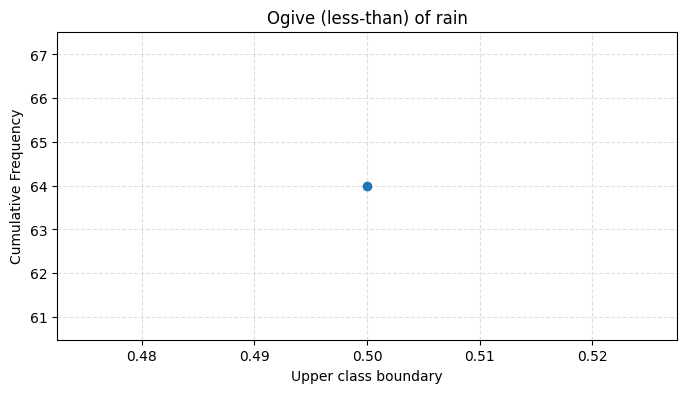

In [ ]:
# D: Plots for numeric column: rain
col = "rain"
if col not in df.columns:
    print('Column not found:', col)
else:
    s = df[col]
    print('Plotting for:', col)
    plot_histogram(s, bins='sturges', title=f'Histogram of {col}', xlabel=col)
    table = grouped_frequency_table(s, bins='sturges')
    plot_frequency_polygon(table, title=f'Frequency Polygon of {col}')
    plot_ogive(table, title=f'Ogive (less-than) of {col}')


Plotting bar chart for: district


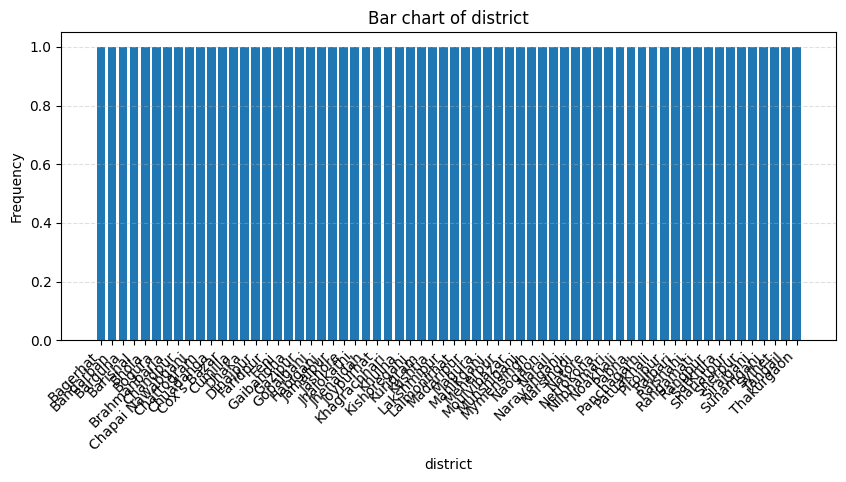

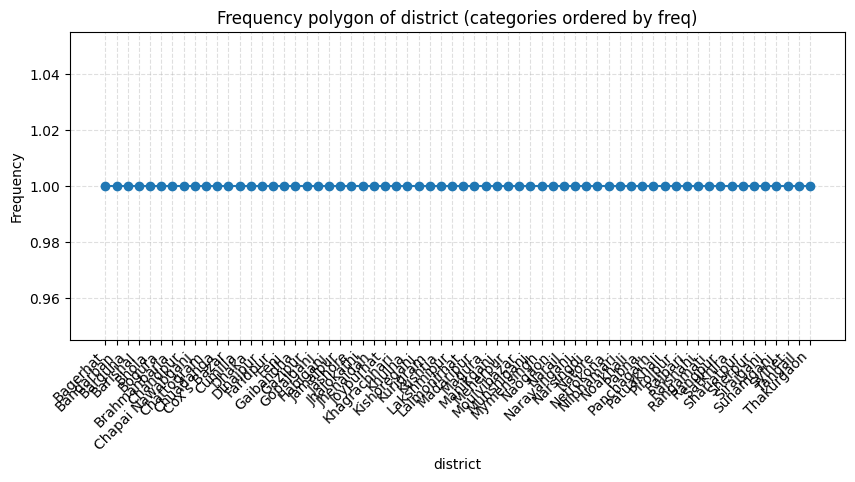

In [ ]:
# D: Plots for categorical column: district
col = "district"
if col not in df.columns:
    print('Column not found:', col)
else:
    s = df[col].dropna().astype(str)
    table = categorical_frequency_table(s)
    print('Plotting bar chart for:', col)
    if not table.empty:
        plt.figure(figsize=(10,4))
        plt.bar(table['Category'], table['Frequency (f)'])
        plt.title(f'Bar chart of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.4)
        plt.show()
    if not table.empty:
        plt.figure(figsize=(10,4))
        plt.plot(table['Category'], table['Frequency (f)'], marker='o')
        plt.title(f'Frequency polygon of {col} (categories ordered by freq)')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, linestyle='--', alpha=0.4)
        plt.show()


Plotting bar chart for: division


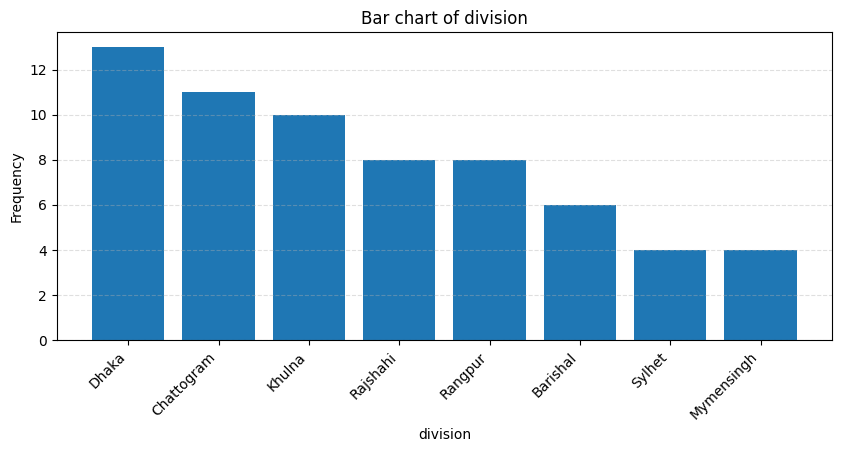

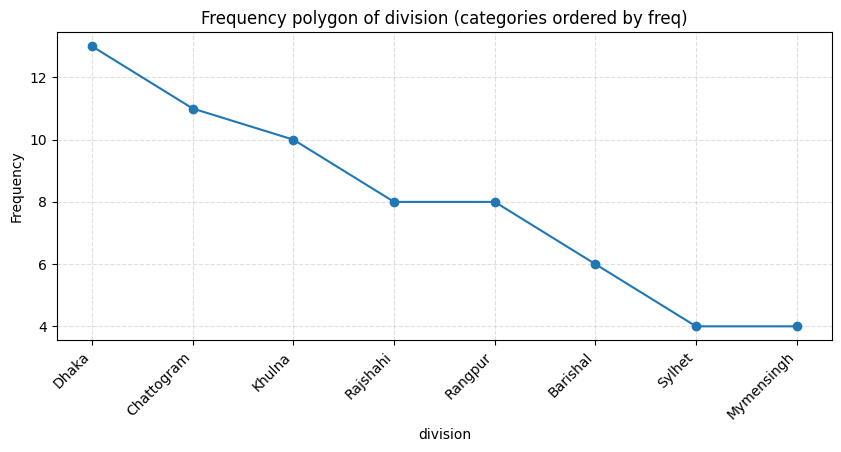

In [ ]:
# D: Plots for categorical column: division
col = "division"
if col not in df.columns:
    print('Column not found:', col)
else:
    s = df[col].dropna().astype(str)
    table = categorical_frequency_table(s)
    print('Plotting bar chart for:', col)
    if not table.empty:
        plt.figure(figsize=(10,4))
        plt.bar(table['Category'], table['Frequency (f)'])
        plt.title(f'Bar chart of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.4)
        plt.show()
    if not table.empty:
        plt.figure(figsize=(10,4))
        plt.plot(table['Category'], table['Frequency (f)'], marker='o')
        plt.title(f'Frequency polygon of {col} (categories ordered by freq)')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, linestyle='--', alpha=0.4)
        plt.show()


## E. Task 3: Analysis and Conclusion


In [ ]:
# E: Auto-analysis for numeric column: temp_c
col = "temp_c"
if col not in df.columns:
    print('Column not found:', col)
else:
    s = df[col].dropna().astype(float)
    n = int(s.count())
    if n==0:
        print('No data for column', col)
    else:
        mean = s.mean(); median = s.median(); skew = s.skew()
        q1 = s.quantile(0.25); q3 = s.quantile(0.75); iqr = q3 - q1
        low = q1 - 1.5*iqr; high = q3 + 1.5*iqr
        outliers = s[(s < low) | (s > high)].tolist()
        table = grouped_frequency_table(s, bins='sturges')
        if not table.empty:
            peak_row = table.loc[table['Frequency (f)'].idxmax()]
            peak_interval = peak_row['Class Interval']
            peak_freq = int(peak_row['Frequency (f)'])
            peak_pct = peak_row['Relative Frequency (rf)'] * 100
        else:
            peak_interval = 'N/A'; peak_freq = 0; peak_pct = 0.0
        print('I analyzed column: ' + col + '.')
        print('Count: ' + str(n) + '. Mean: ' + f"{mean:.2f}" + '. Median: ' + f"{median:.2f}" + '. Skewness: ' + f"{skew:.2f}" + '.')
        if skew > 0.5:
            print('Data is right skewed.')
        elif skew < -0.5:
            print('Data is left skewed.')
        else:
            print('Data is roughly symmetric.')
        if len(outliers) == 0:
            print('No outliers found by IQR method.')
        else:
            ex = ', '.join([str(round(x,2)) for x in outliers[:5]])
            print('Outliers count: ' + str(len(outliers)) + '. Examples: ' + ex + '.')
        print('Most values are in class: ' + str(peak_interval) + ' (n=' + str(peak_freq) + ', ' + f"{peak_pct:.1f}" + '%).')
        print('Short conclusion: Most data are near the peak class. Check outliers for errors or rare cases.')


I analyzed column: temp_c.
Count: 64. Mean: 32.34. Median: 32.33. Skewness: -0.91.
Data is left skewed.
Outliers count: 4. Examples: 29.38, 35.13, 28.61, 28.54.
Most values are in class: 31.364 - 32.306 (n=21, 32.8%).
Short conclusion: Most data are near the peak class. Check outliers for errors or rare cases.


In [ ]:
# E: Auto-analysis for numeric column: humidity
col = "humidity"
if col not in df.columns:
    print('Column not found:', col)
else:
    s = df[col].dropna().astype(float)
    n = int(s.count())
    if n==0:
        print('No data for column', col)
    else:
        mean = s.mean(); median = s.median(); skew = s.skew()
        q1 = s.quantile(0.25); q3 = s.quantile(0.75); iqr = q3 - q1
        low = q1 - 1.5*iqr; high = q3 + 1.5*iqr
        outliers = s[(s < low) | (s > high)].tolist()
        table = grouped_frequency_table(s, bins='sturges')
        if not table.empty:
            peak_row = table.loc[table['Frequency (f)'].idxmax()]
            peak_interval = peak_row['Class Interval']
            peak_freq = int(peak_row['Frequency (f)'])
            peak_pct = peak_row['Relative Frequency (rf)'] * 100
        else:
            peak_interval = 'N/A'; peak_freq = 0; peak_pct = 0.0
        print('I analyzed column: ' + col + '.')
        print('Count: ' + str(n) + '. Mean: ' + f"{mean:.2f}" + '. Median: ' + f"{median:.2f}" + '. Skewness: ' + f"{skew:.2f}" + '.')
        if skew > 0.5:
            print('Data is right skewed.')
        elif skew < -0.5:
            print('Data is left skewed.')
        else:
            print('Data is roughly symmetric.')
        if len(outliers) == 0:
            print('No outliers found by IQR method.')
        else:
            ex = ', '.join([str(round(x,2)) for x in outliers[:5]])
            print('Outliers count: ' + str(len(outliers)) + '. Examples: ' + ex + '.')
        print('Most values are in class: ' + str(peak_interval) + ' (n=' + str(peak_freq) + ', ' + f"{peak_pct:.1f}" + '%).')
        print('Short conclusion: Most data are near the peak class. Check outliers for errors or rare cases.')


I analyzed column: humidity.
Count: 64. Mean: 63.66. Median: 63.00. Skewness: 0.56.
Data is right skewed.
No outliers found by IQR method.
Most values are in class: 64.857 - 69.143 (n=16, 25.0%).
Short conclusion: Most data are near the peak class. Check outliers for errors or rare cases.


In [ ]:
# E: Auto-analysis for numeric column: wind_speed
col = "wind_speed"
if col not in df.columns:
    print('Column not found:', col)
else:
    s = df[col].dropna().astype(float)
    n = int(s.count())
    if n==0:
        print('No data for column', col)
    else:
        mean = s.mean(); median = s.median(); skew = s.skew()
        q1 = s.quantile(0.25); q3 = s.quantile(0.75); iqr = q3 - q1
        low = q1 - 1.5*iqr; high = q3 + 1.5*iqr
        outliers = s[(s < low) | (s > high)].tolist()
        table = grouped_frequency_table(s, bins='sturges')
        if not table.empty:
            peak_row = table.loc[table['Frequency (f)'].idxmax()]
            peak_interval = peak_row['Class Interval']
            peak_freq = int(peak_row['Frequency (f)'])
            peak_pct = peak_row['Relative Frequency (rf)'] * 100
        else:
            peak_interval = 'N/A'; peak_freq = 0; peak_pct = 0.0
        print('I analyzed column: ' + col + '.')
        print('Count: ' + str(n) + '. Mean: ' + f"{mean:.2f}" + '. Median: ' + f"{median:.2f}" + '. Skewness: ' + f"{skew:.2f}" + '.')
        if skew > 0.5:
            print('Data is right skewed.')
        elif skew < -0.5:
            print('Data is left skewed.')
        else:
            print('Data is roughly symmetric.')
        if len(outliers) == 0:
            print('No outliers found by IQR method.')
        else:
            ex = ', '.join([str(round(x,2)) for x in outliers[:5]])
            print('Outliers count: ' + str(len(outliers)) + '. Examples: ' + ex + '.')
        print('Most values are in class: ' + str(peak_interval) + ' (n=' + str(peak_freq) + ', ' + f"{peak_pct:.1f}" + '%).')
        print('Short conclusion: Most data are near the peak class. Check outliers for errors or rare cases.')


I analyzed column: wind_speed.
Count: 64. Mean: 4.02. Median: 4.16. Skewness: -1.39.
Data is left skewed.
Outliers count: 7. Examples: 1.09, 2.17, 2.21, 2.23, 1.8.
Most values are in class: 3.924 - 4.617 (n=26, 40.6%).
Short conclusion: Most data are near the peak class. Check outliers for errors or rare cases.


In [ ]:
# E: Auto-analysis for numeric column: rain
col = "rain"
if col not in df.columns:
    print('Column not found:', col)
else:
    s = df[col].dropna().astype(float)
    n = int(s.count())
    if n==0:
        print('No data for column', col)
    else:
        mean = s.mean(); median = s.median(); skew = s.skew()
        q1 = s.quantile(0.25); q3 = s.quantile(0.75); iqr = q3 - q1
        low = q1 - 1.5*iqr; high = q3 + 1.5*iqr
        outliers = s[(s < low) | (s > high)].tolist()
        table = grouped_frequency_table(s, bins='sturges')
        if not table.empty:
            peak_row = table.loc[table['Frequency (f)'].idxmax()]
            peak_interval = peak_row['Class Interval']
            peak_freq = int(peak_row['Frequency (f)'])
            peak_pct = peak_row['Relative Frequency (rf)'] * 100
        else:
            peak_interval = 'N/A'; peak_freq = 0; peak_pct = 0.0
        print('I analyzed column: ' + col + '.')
        print('Count: ' + str(n) + '. Mean: ' + f"{mean:.2f}" + '. Median: ' + f"{median:.2f}" + '. Skewness: ' + f"{skew:.2f}" + '.')
        if skew > 0.5:
            print('Data is right skewed.')
        elif skew < -0.5:
            print('Data is left skewed.')
        else:
            print('Data is roughly symmetric.')
        if len(outliers) == 0:
            print('No outliers found by IQR method.')
        else:
            ex = ', '.join([str(round(x,2)) for x in outliers[:5]])
            print('Outliers count: ' + str(len(outliers)) + '. Examples: ' + ex + '.')
        print('Most values are in class: ' + str(peak_interval) + ' (n=' + str(peak_freq) + ', ' + f"{peak_pct:.1f}" + '%).')
        print('Short conclusion: Most data are near the peak class. Check outliers for errors or rare cases.')


I analyzed column: rain.
Count: 64. Mean: 0.00. Median: 0.00. Skewness: 0.00.
Data is roughly symmetric.
No outliers found by IQR method.
Most values are in class: -0.501 - 0.5 (n=64, 100.0%).
Short conclusion: Most data are near the peak class. Check outliers for errors or rare cases.


In [ ]:
# E: Auto-analysis for categorical column: district
col = "district"
if col not in df.columns:
    print('Column not found:', col)
else:
    s = df[col].dropna().astype(str)
    n = int(s.count())
    if n==0:
        print('No data for column', col)
    else:
        freq = s.value_counts()
        unique = int(s.nunique())
        top3 = freq.head(3)
        print('I analyzed column: ' + col + '.')
        print('Count: ' + str(n) + '. Unique categories: ' + str(unique) + '.')
        for i, (name, val) in enumerate(top3.items(), start=1):
            pct = val / n * 100.0
            print(f'Top {i}: {name} ({val} rows, {pct:.1f}%).')
        top_name = freq.index[0]
        top_cnt = int(freq.iloc[0])
        top_pct = top_cnt / n * 100.0
        if top_pct > 50:
            print('Data is imbalanced. Big category is ' + str(top_name) + ' with ' + f"{top_pct:.1f}" + '%.')
        else:
            print('Data is not strongly imbalanced.')
        print('Short conclusion: Report top categories and consider grouping small ones if needed.')


I analyzed column: district.
Count: 64. Unique categories: 64.
Top 1: Bagerhat (1 rows, 1.6%).
Top 2: Bandarban (1 rows, 1.6%).
Top 3: Barguna (1 rows, 1.6%).
Data is not strongly imbalanced.
Short conclusion: Report top categories and consider grouping small ones if needed.


In [ ]:
# E: Auto-analysis for categorical column: division
col = "division"
if col not in df.columns:
    print('Column not found:', col)
else:
    s = df[col].dropna().astype(str)
    n = int(s.count())
    if n==0:
        print('No data for column', col)
    else:
        freq = s.value_counts()
        unique = int(s.nunique())
        top3 = freq.head(3)
        print('I analyzed column: ' + col + '.')
        print('Count: ' + str(n) + '. Unique categories: ' + str(unique) + '.')
        for i, (name, val) in enumerate(top3.items(), start=1):
            pct = val / n * 100.0
            print(f'Top {i}: {name} ({val} rows, {pct:.1f}%).')
        top_name = freq.index[0]
        top_cnt = int(freq.iloc[0])
        top_pct = top_cnt / n * 100.0
        if top_pct > 50:
            print('Data is imbalanced. Big category is ' + str(top_name) + ' with ' + f"{top_pct:.1f}" + '%.')
        else:
            print('Data is not strongly imbalanced.')
        print('Short conclusion: Report top categories and consider grouping small ones if needed.')


I analyzed column: division.
Count: 64. Unique categories: 8.
Top 1: Dhaka (13 rows, 20.3%).
Top 2: Chattogram (11 rows, 17.2%).
Top 3: Khulna (10 rows, 15.6%).
Data is not strongly imbalanced.
Short conclusion: Report top categories and consider grouping small ones if needed.


## F. Task 4: Challenges

Write reflections. Use short sentences. Example lines:

- I dropped missing values for tables.
- Choosing class limits was not easy. I used Sturges rule.
- Some categories have low counts. I suggest grouping them.


## G. Submission Guidelines

